In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ***Importing the Dataset***

In [222]:
df = pd.read_csv('datasets/startup_funding.csv')

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


### ***Dropping the Remark column and setting the Index column***

In [223]:
df.drop(columns = ['Remarks'],inplace = True)
df.set_index('Sr No', inplace=True)

### ***Renaming the columns***

In [224]:
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startup',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'city',
    'Investors Name': 'investors',
    'InvestmentnType': 'round',
    'Amount in USD': 'amount'
}, inplace=True)

### ***Just checking up on the dataset ...***

In [239]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaear,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-01-01,s://www.wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


### ***Stripping and Replacing***

In [226]:
df.amount = df.amount.str.lstrip('\\xc2\\xa0')
df.amount = df.amount.str.replace('N/A', '0')
df.amount = df.amount.str.replace(',', '')
df.amount = df.amount.str.replace('unknown', '0')
df.amount = df.amount.str.replace('undisclosed', '0')
df.amount = df.amount.str.replace('Undisclosed', '0')
df.amount = df.amount.str.rstrip('+')

df.iloc[2604:2608, :]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
2605,09/07/2015,\\xc2\\xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,0
2606,09/07/2015,\\xc2\\xa0Notesgen,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,0
2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,600000
2608,10/07/2015,\\xc2\\xa0Footprints Education,\\xc2\\xa0Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,685000


### ***Typecasting the amount values to float64***

In [227]:
df.amount = df.amount.astype(float)

df.amount.dtype

dtype('float64')

### ***Cleaning Startups column***

In [228]:
df.startup = df.startup.str.strip(" http://")
df.startup = df.startup.str.strip(" .in")
df.startup = df.startup.str.strip(" .com")
df.startup = df.startup.str.strip("")
df.startup = df.startup.str.strip("�")
df.startup = df.startup.str.strip("\\xe2\\x80\\x99")

df['startup'].sample(20)

Sr No
2692        Medwell Ventures
1423                FlickBay
78              Avail Financ
851                   Swiggy
2469                FirstTou
2438                LafaLafa
2203                     iba
633                   TouchK
1746                 Hungama
1552            ImageProVisi
713     Byju\\xe2\\x80\\x99s
2515                 BigBask
1375                  Furlen
2903                   wWher
485                     Fisd
280                  Credrig
2363                Razorpay
1217               Scienapti
1843                Medidail
760                 DarwinBo
Name: startup, dtype: object

### ***Normalized Conversion to Rupees***

In [229]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

df['amount'] = df['amount'].apply(to_inr)

df.iloc[2604:2610, :]

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
2605,09/07/2015,c2\\xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,0.00000
2606,09/07/2015,c2\\xa0Notesg,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,0.00000
2607,\\xc2\\xa010/7/2015,c2\\xa0Infinity Assuranc,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,4.95000
2608,10/07/2015,c2\\xa0Footprints Educati,\\xc2\\xa0Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,5.65125
2609,10/07/2015,c2\\xa0Loylty Rewards,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,159.63750
2610,13/07/2015,c2\\xa0Amey,\\xc2\\xa0Contact Center Software Platform,NaN,\\xc2\\xa0Gurgaon,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,41.25000


### ***Stripping the columns startup, vertical, city, investors and date***

In [240]:
def colstrip(df, cols):
    for col in cols:
        df[col] = df[col].str.lstrip('\\xc2\\xa0')
        
colstrip(df, ['startup', 'vertical', 'city', 'investors'])

df.at[4, 'startup'] = 'Wealth Bucket'

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaear,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-01-01,Wealth Bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


### ***Fixing the 'dates' column*** using **Excel**

In [231]:
df.date = df.date.str.lstrip('\\xc2\\xa0')

dt = [193, 2572, 2776, 2777, 2832, 3012, 3030]

df.at[dt[0], 'date'] = '5/07/2018'
df.at[dt[1], 'date'] = '1/07/2015'

for i in range(2, 6):
    df.at[dt[i], 'date'] = df.at[dt[i], 'date'].replace('.', '/')

df.at[dt[6], 'date'] = '22' + df.at[dt[6], 'date']
df.at[dt[6], 'date'] = df.at[dt[6], 'date'].replace('//', '/')

df.date = pd.to_datetime(df.date, format='mixed')

df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaear,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-01-01,s://www.wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


#### Determining the NaN ***value counts*** in all the columns

In [232]:
result = df.apply(lambda x: x.isna().value_counts())
result

,date,startup,vertical,subvertical,city,investors,round,amount
False,3044.0,3044.0,2873,2108,2864,3020,3040,2084
True,NaN,NaN,171,936,180,24,4,960


### Removing the NaN values

In [233]:
rem = [col for col in result.columns if result[col].iloc[1].dtype != np.float64]

df = df.dropna(subset=rem)

df

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaear,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-01-01,s://www.wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-01-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2099,2016-09-01,Qriy,Consumer Internet,Online Fitness & Educational information Aggre...,Jodhpur,Idein Ventures,Seed Funding,1.320000
2101,2016-09-01,Aisl,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,1.526250
2102,2016-09-01,FreshMenu,Consumer Internet,Fresh Food Delivery platform,Bangalore,"Zodius Technology Fund, Lightspeed Venture Par...",Private Equity,140.250000


In [234]:
df.apply(lambda x: x.isna().value_counts())

,date,startup,vertical,subvertical,city,investors,round,amount
False,1406,1406,1406,1406,1406,1406,1406,1406


### Finding Investors

In [249]:
investors = sorted(set(df['investors'].str.split(',').sum()))

print(f"Number of investors = {len(investors)}")

Number of investors = 1884


### Finding ***Investor Details*** , example - _IDG Ventures_

In [263]:
idgv = df[df['investors'].str.contains('IDG Ventures')]

idgv.head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripot,Social Media,New Delhi,Series B,29.628844
223,2018-07-30,Cure F,Consumer Internet,Bengaluru,Private Equity,990.000000
259,2018-05-01,Bizong,Consumer Internet,Mumbai,Private Equity,16.500000
310,2018-06-04,POP,Technology,Delhi,Private Equity,45.375000
439,2017-07-12,Shakt,Ecommerce,Chennai,Debt Funding,2.475000


In [265]:
idgv.groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Cure F               990.000000
Lenskar              495.000000
Curef                123.750000
Xpressbees           103.125000
POP                   70.950000
Uniphor               56.100000
CloudCherry           49.500000
HealthifyM            49.500000
Sigtupl               47.850000
Flyrob                43.725000
RentMoj               41.250000
Aasaanjobs            41.250000
CureF                 41.250000
Bizong                41.250000
PlaySimpl             33.000000
Vayana                33.000000
Blowhor               30.112500
Tripot                29.628844
Active.a              24.750000
Hansel.i              11.137500
Paa                   11.137500
Hevo Data              8.250000
Little Black Book      8.250000
Heckyl                 5.775000
Infisecur              4.950000
Shakt                  2.475000
Name: amount, dtype: float64

#### Sectors of investment

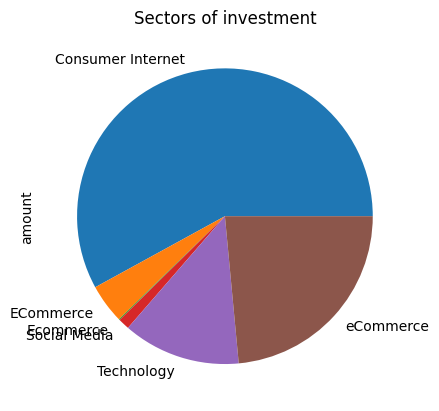

In [299]:
idgv.groupby('vertical')['amount'].sum().plot(kind='pie', fontsize=10)

plt.title('Sectors of investment')
plt.show()

#### Stages of Investment

### ***Cleaned CSV***

In [235]:
# df.to_csv('startup_cleaned.csv',index=False)  